In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from datetime import datetime
from datetime import timedelta

In [10]:
airbnb = pd.read_csv('airbnb_nyc.csv', delimiter=',')

# Location Location Location - An EDA of Airbnb Listings in NYC


## How does the location affect customer satisfaction? 


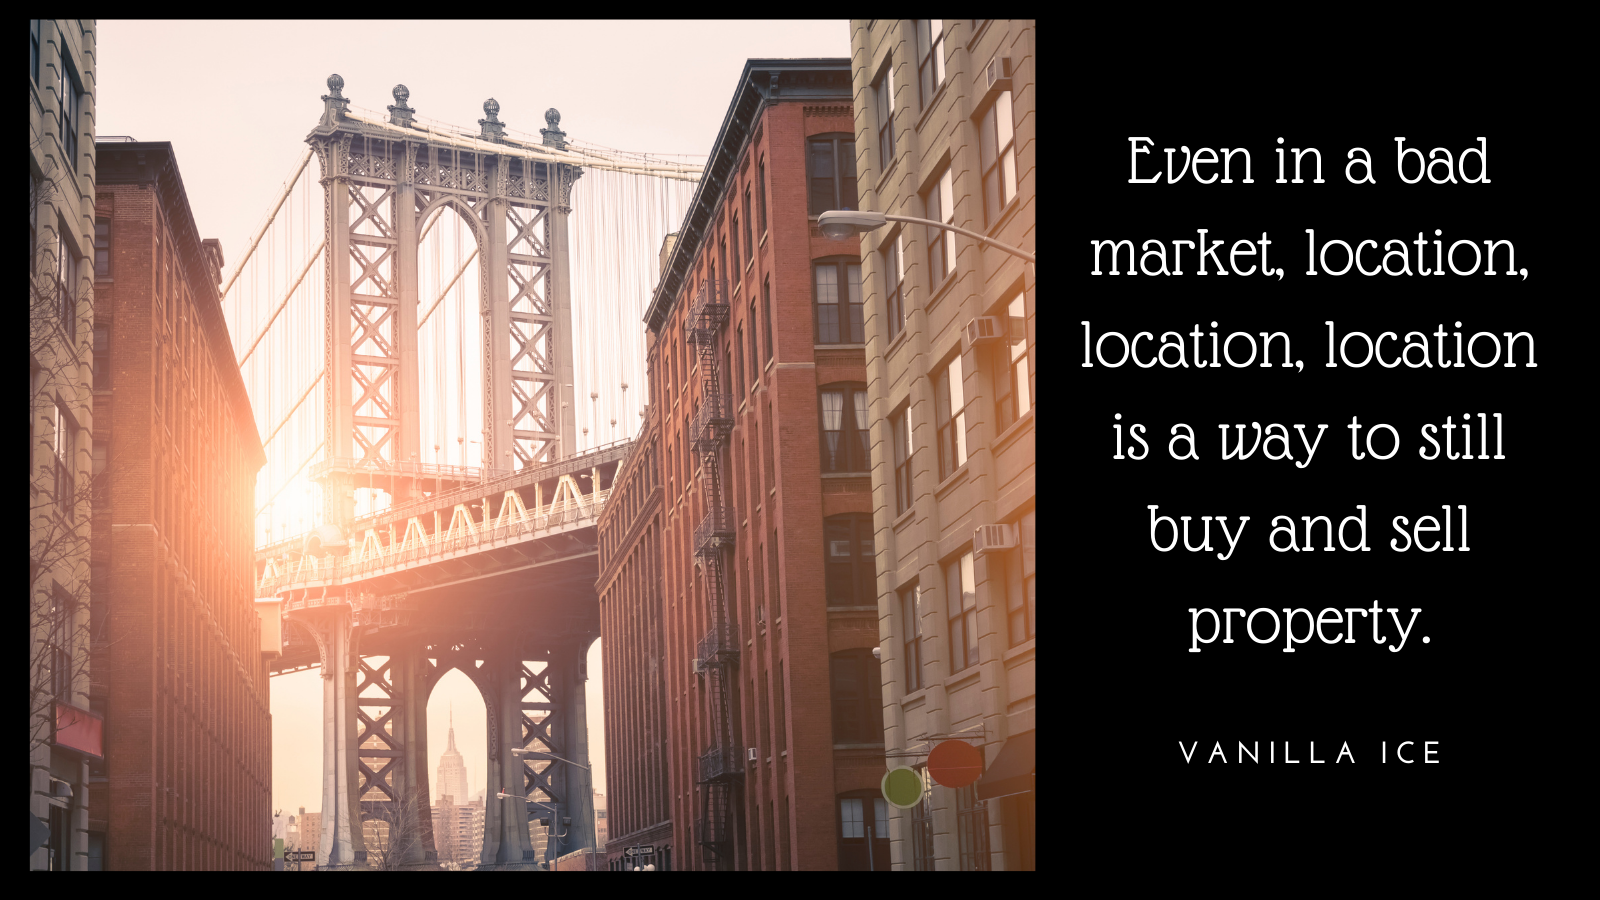

In [157]:
from folium.plugins import HeatMap

info = location_review[['latitude', 'longitude', 'review_scores_rating']]
info = info.dropna()

zipped = list(zip(info['latitude'], info['longitude'], info['review_scores_rating']))

review_map = folium.Map(location=[40.72392, -73.98719], tiles = "OpenStreetMap", zoom_start=12)

review_map.add_child(HeatMap(zipped, min_opacity=0.2, radius=10, blur=6))
                      
review_map


### A Heat Map of Review Scores Rating of Listings in NYC

Using the given data, a heat map was created to illustrate the distribution of the Airbnb ratings across the districts of **New York City**. From the heatmap above, it is quite noticeable that the area with the highest ratings can be found in the **Financial District in Lower Manhattan**, which is not surprising as it is a convenient location for both tourists and business people. It also helps that it is well-connected and commute time around the area takes around 15 - 20 minutes. 

Other areas with high ratings can also be found in other areas of Lower Manhattan, particularly the areas close to the Financial District and the Hudson River. Across the Williamsburg bridge, in the hipster side of New York City, the neightbourhood of Williamsburg is a hotspot for younger guests who are looking for an artsy, party vibe. 

Although the distribution depicted by the Review Scores Rating Heatmap seems sound, it is worth taking a closer look at the data. In order to achieve this purpose, a new dataframe was created to extract the relevant columns from the initial dataset. These include:

1. neighbourhood
2. latitude
3. longitude
4. review_scores_rating
5. number_of_reviews
6. number_of_reviews_ltm

In [152]:
# location_review is a dataframe which contains only the columns of interest for this section.
location_review = pd.DataFrame(airbnb[['neighbourhood', 'latitude', 'longitude', 'review_scores_rating', 'number_of_reviews', 'number_of_reviews_ltm']].dropna().sort_values(['review_scores_rating', 'number_of_reviews'], ascending = False))


Other features of the new dataframe include:
- Dropping rows without values 
- Sorting the values by review_scores_rating and number_of_reviews

The purpose of doing this was to find out which neighbourhoods have acquired consistently high review_scores_rating. It also shows the listings that are popular to the guests. Although it is very possible that not all guests leave reviews ([an answer from Quora suggested that 72% of guests leave reviews](https://www.quora.com/What-percent-of-Airbnb-hosts-leave-reviews-for-their-guests)), it can be assumed that properties with a greater number of reviews have had more guests. 

In [168]:
# This shows the first 5 rows of the dataframe.
location_review.head()

,neighbourhood,latitude,longitude,review_scores_rating,number_of_reviews,number_of_reviews_ltm
161,Brooklyn,40.67110,-73.95231,100.0,20,8
169,Kensington,40.64277,-73.97296,100.0,20,8
337,Greenpoint,40.73067,-73.95500,100.0,20,3
5220,Brooklyn,40.68971,-73.96695,100.0,20,5
9902,Queens,40.76933,-73.91165,100.0,20,17


<AxesSubplot:xlabel='number_of_reviews'>

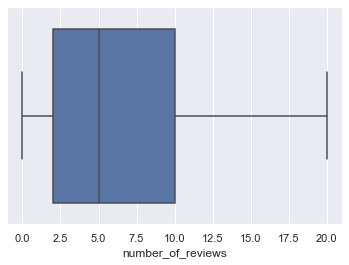

In [158]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=location_review['number_of_reviews'])

### Number Of Reviews
The boxplot above shows that the number of reviews shows that the highest number of reviews for each listing is 20 and the lowest number of reviews is 0 with a median of 5 reviews. Its positive skew indicates that more than 75% of the properties listed have at least 1 review and 50% of the listings have at least 5 reviews. 

<AxesSubplot:xlabel='review_scores_rating'>

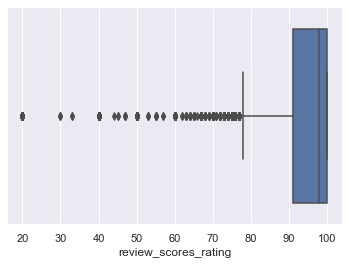

In [159]:
sns.boxplot(x=location_review['review_scores_rating'])

### Review Score Rating
The review score rating box plot shows a big range of values from 20 to 100. The positive skew shown by the diagram, however, gives a very promising sense that most of the guests are happy with their accommodation. Around 75% of the guests who have left a review gave a rating of 90 to 100. 

As it would be interesting to see if the location plays a role in the overall rating, an upper and lower limit will be set for the purpose of this study. 

### The Upper Limit
The first 20 rows show **the top 20 listings** in New York City. As we are looking at the review score ratings with the highest number of reviews (as shown by ***the Number Of Reviews Box Plot***) it could be assumed that these properties have consistently acquired the **highest review score rating, 100.0**.

In [170]:
location_review.head(20)

,neighbourhood,latitude,longitude,review_scores_rating,number_of_reviews,number_of_reviews_ltm
161,Brooklyn,40.67110,-73.95231,100.0,20,8
169,Kensington,40.64277,-73.97296,100.0,20,8
337,Greenpoint,40.73067,-73.95500,100.0,20,3
5220,Brooklyn,40.68971,-73.96695,100.0,20,5
9902,Queens,40.76933,-73.91165,100.0,20,17
10022,Williamsburg,40.71336,-73.96172,100.0,20,5
11079,Harlem,40.80883,-73.94577,100.0,20,2
11603,Midtown,40.76269,-73.99139,100.0,20,9
11968,The Bronx,40.81034,-73.93166,100.0,20,8
12072,Manhattan,40.71893,-74.00330,100.0,20,11


### The Bottom Twenty
The problem with using the properties in the last 20 rows of the dataframe is that they each had only 1 review. This is not a very good basis for this exploration as it is quite possibe that:

1. They could be new properties with inexperienced hosts who unfortunately received negative feedback from their guests.
2. They could be properties that do not usually attract guests and were very unfortunate to receive only 1 bad review from their very small pickings.
3. They could be properties that received such bad reviews no one wanted to rent from them again. 

It is worth looking into these three points further later, however, for the purpose of exploring how location affects guest experience, it is worth manipulating the data to find properties with consistently low ratings. 

In [171]:
location_review.tail(20)

,neighbourhood,latitude,longitude,review_scores_rating,number_of_reviews,number_of_reviews_ltm
25490,Brooklyn,40.65565,-73.92705,20.0,1,1
25851,Brooklyn,40.69080,-73.92784,20.0,1,1
25886,Ridgewood,40.70769,-73.89641,20.0,1,1
26210,Chelsea,40.74781,-73.99436,20.0,1,1
26380,Midtown,40.76515,-73.98586,20.0,1,1
26619,Ridgewood,40.70502,-73.89547,20.0,1,1
26707,Brooklyn,40.68603,-73.87820,20.0,1,1
27010,Sheepshead Bay,40.59842,-73.95667,20.0,1,1
27267,Sunset Park,40.63896,-73.99689,20.0,1,1
27309,Jackson Heights,40.75600,-73.87756,20.0,1,1


In [184]:
location_review[(location_review['number_of_reviews'] > 1) & (location_review['review_scores_rating'] <=40)]

,neighbourhood,latitude,longitude,review_scores_rating,number_of_reviews,number_of_reviews_ltm
8508,Manhattan,40.80045,-73.96119,40.0,5,0
17742,Bedford-Stuyvesant,40.68327,-73.92411,40.0,4,2
3089,Manhattan,40.73226,-74.00644,40.0,3,0
4252,Harlem,40.80395,-73.96531,40.0,3,0
1988,Bedford-Stuyvesant,40.69134,-73.94468,40.0,2,0
6943,Greenpoint,40.73226,-73.95285,40.0,2,0
7883,Manhattan,40.71893,-74.00485,40.0,2,1
9669,Washington Heights,40.84844,-73.93611,40.0,2,0
15770,Midtown,40.76285,-73.98728,40.0,2,0
16178,Manhattan,40.71327,-73.98866,40.0,2,2


In [201]:
marked_review_map = folium.Map(location=[40.67110, -73.95231], tiles = "OpenStreetMap", zoom_start=11)

# The top 20 properties are marked on the map with a golden star.

tip1 = "#1"

folium.Marker(
    [40.67110, -73.95231], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 8 </i>", 
    tooltip=tip1,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip2 = "#2"

folium.Marker(
    [40.64277, -73.97296], 
    popup="<i> Neighbourhood: Kensington, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 8 </i>", 
    tooltip=tip2,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


tip3 = "#3"

folium.Marker(
    [40.73067, -73.95500], 
    popup="<i> Neighbourhood: Greenpoint, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 3 </i>", 
    tooltip=tip3,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip4 = "#4"

folium.Marker(
    [40.68971, -73.95500], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 5 </i>", 
    tooltip=tip4,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip5 = "#5"

folium.Marker(
    [40.76933, -73.91165], 
    popup="<i> Neighbourhood: Queens, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 8 </i>", 
    tooltip=tip5,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip6 = "#6"

folium.Marker(
    [40.71336, -73.96172], 
    popup="<i> Neighbourhood: Williamsburg, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 8 </i>", 
    tooltip=tip6,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


tip7 = "#7"

folium.Marker(
    [40.80883, -73.94577], 
    popup="<i> Neighbourhood: Harlem, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 2 </i>", 
    tooltip=tip7,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip8 = "#8"

folium.Marker(
    [40.76269, -73.99139], 
    popup="<i> Neighbourhood: Midtown, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 9 </i>", 
    tooltip=tip8,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip9 = "#9"

folium.Marker(
    [40.81034, -73.93166], 
    popup="<i> Neighbourhood: The Bronx, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 8  </i>", 
    tooltip=tip9,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip10 = "#10"

folium.Marker(
    [40.71893, -74.00330], 
    popup="<i> Neighbourhood: Manhattan, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 11 </i>", 
    tooltip=tip10,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip11 = "#11"

folium.Marker(
    [40.71555, -73.94842], 
    popup="<i> Neighbourhood: Williamsburg, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 6 </i>", 
    tooltip=tip11,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip12 = "#12"

folium.Marker(
    [40.78704, -73.94209], 
    popup="<i> Neighbourhood: Harlem, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 9 </i>", 
    tooltip=tip12,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip13 = "#13"

folium.Marker(
    [40.71769, -73.96339], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 14 </i>", 
    tooltip=tip13,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip14 = "#14"

folium.Marker(
    [40.58876, -73.97349], 
    popup="<i> Neighbourhood: Gravesend, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 14 </i>", 
    tooltip=tip14,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip15 = "#15"

folium.Marker(
    [40.72997, -73.98772], 
    popup="<i> Neighbourhood: Manhattan, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 13 </i>", 
    tooltip=tip15,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip16 = "#16"

folium.Marker(
    [40.70329, -73.92213], 
    popup="<i> Neighbourhood: Bushwick, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 16 </i>", 
    tooltip=tip16,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip17 = "#17"

folium.Marker(
    [40.70329, -73.92213], 
    popup="<i> Neighbourhood: Williamsburg, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 13 </i>", 
    tooltip=tip17,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip18 = "#18"

folium.Marker(
    [40.71107, -73.94665], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 20 </i>", 
    tooltip=tip18,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip19 = "#19"

folium.Marker(
    [40.72018, -73.95730], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 20 </i>", 
    tooltip=tip19,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

tip20 = "#20"

folium.Marker(
    [40.82996, -73.94714], 
    popup="<i> Neighbourhood: Hamilton Heights, Rating = 100, Number of reviews = 20, LTM - Number of Reviews = 20 </i>", 
    tooltip=tip20,
    icon=folium.Icon(icon ='fa-star',
                     color ='orange', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


# The 20 companies with the lowest ratings with number of reviews > 1 are marked with a gray sad face.


l_tip1 = "Low-1"

folium.Marker(
    [40.80317, -73.95559], 
    popup="<i> Neighbourhood: Manhattan, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip1,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip2 = "Low-2"

folium.Marker(
    [40.64032, -73.99493], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip2,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


l_tip3 = "Low-3"

folium.Marker(
    [40.74225, -73.97943], 
    popup="<i> Neighbourhood: Manhattan, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip3,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip4 = "Low-4"

folium.Marker(
    [40.70258, -73.92614], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip4,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip5 = "Low-5"

folium.Marker(
    [40.80402, -73.96345], 
    popup="<i> Neighbourhood: Manhattan, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip5,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip6 = "Low-6"

folium.Marker(
    [40.66181, -73.98218], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip6,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip7 = "Low-7"

folium.Marker(
    [40.79896, -73.96027], 
    popup="<i> Neighbourhood: Manhattan, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip7,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip8 = "Low-8"

folium.Marker(
    [40.63928, -73.91081], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip8,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip9 = "Low-9"

folium.Marker(
    [40.72056, -73.98539], 
    popup="<i> Neighbourhood: Lower East Side, Rating = 20, Number of reviews = 2, LTM - Number of Reviews = 0 </i>", 
    tooltip=l_tip9,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip10 = "Low-10"

folium.Marker(
    [40.69264, -73.90485], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 20, Number of reviews = 3, LTM - Number of Reviews = 0 </i>", 
    tooltip=l_tip10,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip11 = "Low-11"

folium.Marker(
    [40.80125, -73.96529], 
    popup="<i> Neighbourhood: Upper West Side, Rating = 20, Number of reviews = 3, LTM - Number of Reviews = 0 </i>", 
    tooltip=l_tip11,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip12 = "Low-12"

folium.Marker(
    [40.66676, -73.92957], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 20, Number of reviews = 3, LTM - Number of Reviews = 1 </i>", 
    tooltip=l_tip12,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip13 = "Low-13"

folium.Marker(
    [40.72105, -73.98371], 
    popup="<i> Neighbourhood: Brooklyn, Rating = 20, Number of reviews = 6, LTM - Number of Reviews = 0 </i>", 
    tooltip=l_tip13,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip14 = "Low-14"

folium.Marker(
    [40.79876, -73.96053], 
    popup="<i> Neighbourhood: Manhattan, Rating = 30, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip14,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


l_tip15 = "Low-15"

folium.Marker(
    [40.80301, -73.96644], 
    popup="<i> Neighbourhood: Manhattan, Rating = 30, Number of reviews = 2, LTM - Number of Reviews = 0 </i>", 
    tooltip=l_tip15,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


l_tip16 = "Low-16"

folium.Marker(
    [40.73568, -73.98062], 
    popup="<i> Neighbourhood: Manhattan, Rating = 30, Number of reviews = 2, LTM - Number of Reviews = 0 </i>", 
    tooltip=l_tip16,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip17 = "Low-17"

folium.Marker(
    [40.76915, -73.95515], 
    popup="<i> Neighbourhood: Upper East Side, Rating = 33, Number of reviews = 3, LTM - Number of Reviews = 3 </i>", 
    tooltip=l_tip17,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip18 = "Low-18"

folium.Marker(
    [40.67627, -73.77059], 
    popup="<i> Neighbourhood: Jamaica, Rating = 33, Number of reviews = 3, LTM - Number of Reviews = 1 </i>", 
    tooltip=l_tip18,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)

l_tip19 = "Low-19"

folium.Marker(
    [40.80745, -73.93955], 
    popup="<i> Neighbourhood: East Harlem, Rating = 40, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip19,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


l_tip20 = "Low-20"

folium.Marker(
    [40.70393, -73.90851], 
    popup="<i> Neighbourhood: Ridgewood, Rating = 40, Number of reviews = 2, LTM - Number of Reviews = 2 </i>", 
    tooltip=l_tip20,
    icon=folium.Icon(icon ='fa-frown-o',
                     color ='gray', 
                     icon_color ='#F8F8FF', 
                     prefix = 'fa')
).add_to(marked_review_map)


marked_review_map


### Maybe it's not all about location, after all!
After a closer look at the data and plotting the locations of the top 20 listings with consistent high scores and those of the bottom 20 with more than one review, it can be seen that they are mostly in the same location. Within the bottom 20 listings, only 1 listing is in a district that is not within the prime locations indicated in the heat map. Another interesting detail is that this property does not ha

<AxesSubplot:xlabel='review_scores_rating', ylabel='number_of_reviews'>

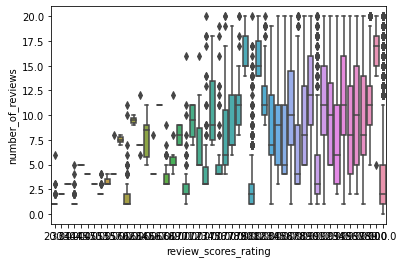

In [128]:
sns.boxplot(data=location_review, x='review_scores_rating', y='number_of_reviews')

In [11]:
airbnb.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [11]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

In [15]:
airbnb[['review_scores_checkin', 'self_check_in', 'check_in_24h', 'host_greeting']].dropna()

,review_scores_checkin,self_check_in,check_in_24h,host_greeting
0,10.0,1,1,-1
3,10.0,-1,-1,1
6,10.0,-1,-1,-1
7,10.0,-1,-1,-1
8,10.0,-1,1,-1
...,...,...,...,...
29948,10.0,-1,-1,-1
29950,10.0,-1,-1,-1
30082,10.0,-1,-1,-1
30088,10.0,1,-1,-1


In [18]:
# number of times the host ID appeared
airbnb.value_counts('host_id').head(20)

host_id
219517861    236
107434423    159
137358866    103
30283594      94
12243051      78
61391963      72
16098958      66
22541573      50
200380610     44
26377263      43
1475015       36
19303369      36
113805886     33
213781715     33
238321374     32
2856748       31
2119276       30
13347167      29
119669058     28
190921808     26
dtype: int64

In [19]:
# number of times the name of the listing appeared. 
airbnb.value_counts('name').head(20)

name
Hillside Hotel                                     18
Home away from home                                12
Artsy Private BR in Fort Greene Cumberland         10
New york Multi-unit building                       10
Private room in Williamsburg                        8
Brooklyn Apartment                                  8
Private Room                                        7
Private room                                        7
Cozy Brooklyn Apartment                             6
Cozy Private Room                                   5
East Village Apartment                              5
A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE     5
Cozy Apartment                                      5
Private Room in Brooklyn                            5
Room in the heart of Williamsburg                   5
Cozy East Village Apartment                         5
Private room in Brooklyn                            5
New York Apartment                                  5
Home Away From Home    

<AxesSubplot:xlabel='number_of_reviews', ylabel='review_scores_rating'>

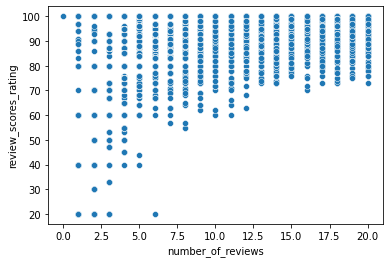

In [24]:
sns.scatterplot(data=airbnb, x="number_of_reviews", y= 
               "review_scores_rating")

In [25]:
airbnb.sort_values('number_of_reviews')

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
30178,36487245,Trendy duplex in the very heart of Hell's Kitchen,Private room in a nice duplex in the very hear...,Private room in a nice duplex in the very hear...,none,NaN,NaN,NaN,68119814,42480.0,...,-1,1,-1,-1,-1,-1,-1,1,-1,1
14248,20897863,1st floor room in the heart of Williamsburg,"Brand new queen size memory foam mattress, Net...","Brand new queen size memory foam mattress, Net...",none,NaN,NaN,Please do your dishes and take out your trash,12584768,41695.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6631,9844892,Family-friendly Village Apartment,"Walk inside to a cozy, humble living quarters ...","Walk inside to a cozy, humble living quarters ...",none,MacDougal street is always alive day and night...,Located only 1 block from the W 4th St subway ...,Please no smoking in the apartment.,50690190,42344.0,...,-1,1,-1,-1,-1,1,-1,-1,-1,-1
14249,20898140,"Long Island city, 15 min to Bryant Park",In Between the F and the N lines on the subway...,In Between the F and the N lines on the subway...,none,NaN,NaN,NaN,149722669,42986.0,...,-1,1,-1,-1,-1,1,-1,1,-1,1
6628,9844161,[Prospect park] Brand New Huge Room,A spacious room with two windows and a walk-in...,A spacious room with two windows and a walk-in...,none,NaN,- one block from the 2/5 trains - two blocks f...,NaN,44791860,42268.0,...,1,1,-1,1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,6965529,Big comfy space close to Yankees.,Quiet comfortable room 2 block walking distanc...,Quiet comfortable room 2 block walking distanc...,none,Friendly quiet neighborhood with a market dire...,"Metro trains 4, D, and B all within walking di...",I do not charge a cleaning fee because I expec...,2001830,40993.0,...,-1,1,-1,1,-1,-1,-1,1,1,-1
12575,18916381,Large Park Slope Home with Private Garden,Spacious and Bright 3 bedroom 3 bath 3 story h...,Spacious and Bright 3 bedroom 3 bath 3 story h...,none,Park Slope is a cool but family friendly in Br...,NaN,NaN,6252064,41400.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4217,6987811,Cozy Brooklyn Room W/ Skylight,This room is truly cozy without being tiny. I...,This room is truly cozy without being tiny. I...,none,The neighborhood is a lively mixture of Caribb...,The J train is 5 blocks away and about a five ...,Please be nice to the other guests and clean u...,23582893,41953.0,...,-1,1,-1,-1,-1,1,-1,-1,-1,-1
18133,25917234,Artist Loft in Tribeca,Our unique artist loft is located in the heart...,Our unique artist loft is located in the heart...,none,The ACE and 1 trains are within a 8 minute walk.,Train is the best with close proximity bro num...,- No shoes in the apartment. - Please don’t bo...,6255854,41400.0,...,-1,1,-1,1,-1,-1,1,-1,-1,-1


In [27]:
airbnb['number_of_reviews'].max()

20

In [28]:
airbnb['number_of_reviews'].min()

0

In [31]:
airbnb['number_of_reviews'].median()

2.0